## 🦚🦚 Podsumowanie folderu backend 🦚🦚

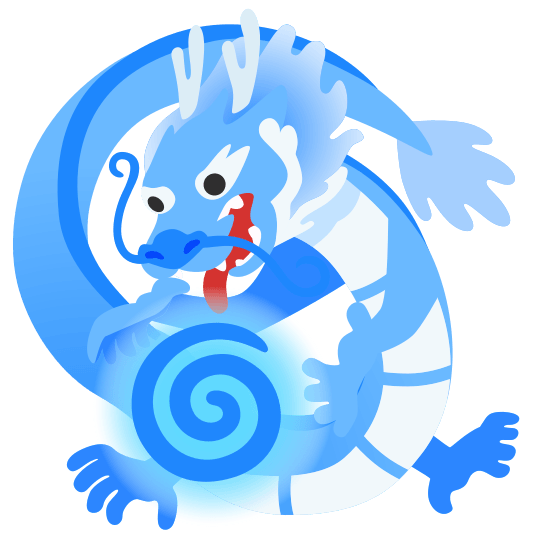

W tej części omówimy poszczególne pliki w folderze backend, które dotychczas utworzyliśmy - później dalej będziemy rozwijać ten folder. 

Nasz folder backend zawiera poszczególne podfoldery:

- config
- controllers
- models
- routes
- oraz plik server.js bezpośrednio w folderze backend


#### Zaczniemy od zrozumienia pliku server.js

In [ ]:
import express from "express";
import dotenv from "dotenv";
import { connectDB } from "./config/db.js";

import productRoutes from "./routes/product.route.js";

dotenv.config();

const app = express();
const PORT = process.env.PORT || 5000

app.use(express.json());

app.use("/api/products", productRoutes);

app.listen(PORT, () => {
  connectDB();
  console.log("Server started at http://localhost:" + PORT);
});


#### Folder CONFIG

W folderze config znajduje się plik db.js:

In [ ]:
// backend/config/db.js

import mongoose from "mongoose"; // import biblioteki która umożliwia operacje na bazie danych


/* funkcja connectDB jest funkcją asynchroniczną, co oznacza, że używa async i await,
aby obsłużyć operacje, które mogą zająć czas (jak połączenie z bazą danych) */

export const connectDB = async () => { 
  try 
  {
    const conn = await mongoose.connect(process.env.MONGO_URI); // próba połączenia z bazą MongoDB za pomocą mongoose.connect()
    // wartość process.env.MONGO_URI pobierana jest z pliku .env (=zmienne środowiskowe), gdzie przechowywany jest adres URI do bazy MongoDB. 
    //URI zawiera informacje o lokalizacji bazy oraz dane uwierzytelniające.

    console.log(`MongoDB Connected: ${conn.connection.host}`); // da nam komunikat o hostingu z bazą, jeśli połączy się bezproblemowo
  }

  /* blok catch przechwyci błąd, jeśli połączenie nie powiedzie się, wyświetli jego treść,
   a następnie zakończy działanie procesu za pomocą process.exit(1) */

  
   catch (error) 
   {
    console.error(`Error: ${error.message}`);
    process.exit(1); //exit(1) to konwencja, która oznacza zakończenie z błędem, co jest przydatne, jeśli chcesz, aby aplikacja nie działała, 
    //dopóki nie będzie poprawnego połączenia z bazą*/ 
  }
};


Plik db.js  pełni rolę konfiguracji i bezpiecznego połączenia z bazą danych MongoDB.

#### Folder CONTROLLERS

W folderze controllers znajduje się plik product.controller.js:

In [ ]:
import mongoose from "mongoose";
import Product from "../models/product.model.js";

export const getProducts = async (req, res) => {
  try {
    const products = await Product.find({});
    res.status(200).json({ success: true, data: products });
  } catch (error) {
    console.log("error in fetching products:", error.message);
    res.status(500).json({ success: false, message: "Server Error" });
  }
};

export const createProduct = async (req, res) => {
  const product = req.body;

  if (!product.name || !product.price || !product.image) {
    return res
      .status(400)
      .json({ success: false, message: "Please provide all fields" });
  }
  const newProduct = new Product(product);

  try {
    await newProduct.save();
    res.status(201).json({ success: true, data: newProduct });
  } catch (error) {
    console.error("Error in Create product:", error.message);
    res.status(500).json({ success: false, message: "Server Error" });
  }
};

export const updateProduct = async (req, res) => {
  const { id } = req.params;

  const product = req.body;
  if (mongoose.Types.ObjectId.isValid(id)) {
    return res
      .status(404)
      .json({ success: false, message: "Invalid Product Id" });
  }
  try {
    const updatedProduct = await Product.findByIdAndUpdate(id, product, {
      new: true,
    });
    res.status(200).json({ success: true, data: updatedProduct });
  } catch (error) {
    res.status(500).json({ success: false, message: "Server Error" });
  }
};

export const deleteProduct = async (req, res) => {
  const { id } = req.params;

  if (mongoose.Types.ObjectId.isValid(id)) {
    return res
      .status(404)
      .json({ success: false, message: "Invalid Product Id" });
  }

  try {
    await Product.findByIdAndDelete(id);
    res.status(200).json({ success: true, message: "Product deleted" });
  } catch (error) {
    console.log("error in deleting product:", error.message);
    res.status(500).json({ success: false, message: "Server Error" });
  }

  console.log("id:", id);
};


#### Folder MODELS

W folderze models znajduje się plik product.model.js:

In [ ]:
// backend/models/product.model.js

import mongoose from "mongoose";

const productSchema = new mongoose.Schema(
  {
    name: {
      type: String,
      required: true,
    },
    price: {
      type: Number,
      required: true,
    },
    image: {
      type: String,
      required: true,
    },
  },
  {
    timestamps: true, // Automatically creates createdAt and updatedAt fields
  }
);

const Product = mongoose.model("Product", productSchema);

// Export the Product model
export default Product;


#### Folder ROUTES

W folderze routes znajduje się plik product.route.js:

In [ ]:
import express from "express";

import {
  createProduct,
  deleteProduct,
  getProducts,
  updateProduct,
} from "../controllers/product.controller.js";

const router = express.Router();

router.get("/", getProducts);
router.post("/", createProduct);
router.put("/:id", updateProduct);
router.delete("/:id", deleteProduct);

export default router;
